In [75]:
import numpy as np
from PIL import Image
import pathlib
import matplotlib.pyplot as plt

In [2]:
data_path = pathlib.Path('/home/kylehsu/data')
source_to_num_classes = {
    'object_shape':       3,
    'robot_x':            8,
    'robot_y':            5,
    'camera_height':      4,
    'object_scale':       4,
    'lighting_intensity': 4,
    'lighting_y_dir':     6,
    'object_color':       4,
    'wall_color':         4,
}

sources = np.load(data_path / 'Isaac3D_down128/labels.npy')


In [5]:
[np.unique(sources[:, i]) for i in range(sources.shape[1])]

[array([0. , 0.5, 1. ]),
 array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
        0.71428571, 0.85714286, 1.        ]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 array([0.        , 0.33333333, 0.66666667, 1.        ])]

In [67]:
c0 = sources[:, 0] == 1
c1 = sources[:, 1] == 6 / 7
c2 = sources[:, 2] == 4 / 4
c4 = sources[:, 4] == 1
c7 = sources[:, 7] == 2 / 3
i_filtered = np.where(c0 & c1 & c2 & c4 & c7)[0]

In [68]:
x_paths = [data_path / 'Isaac3D_down128/images' / f'{i:06}.png' for i in i_filtered]

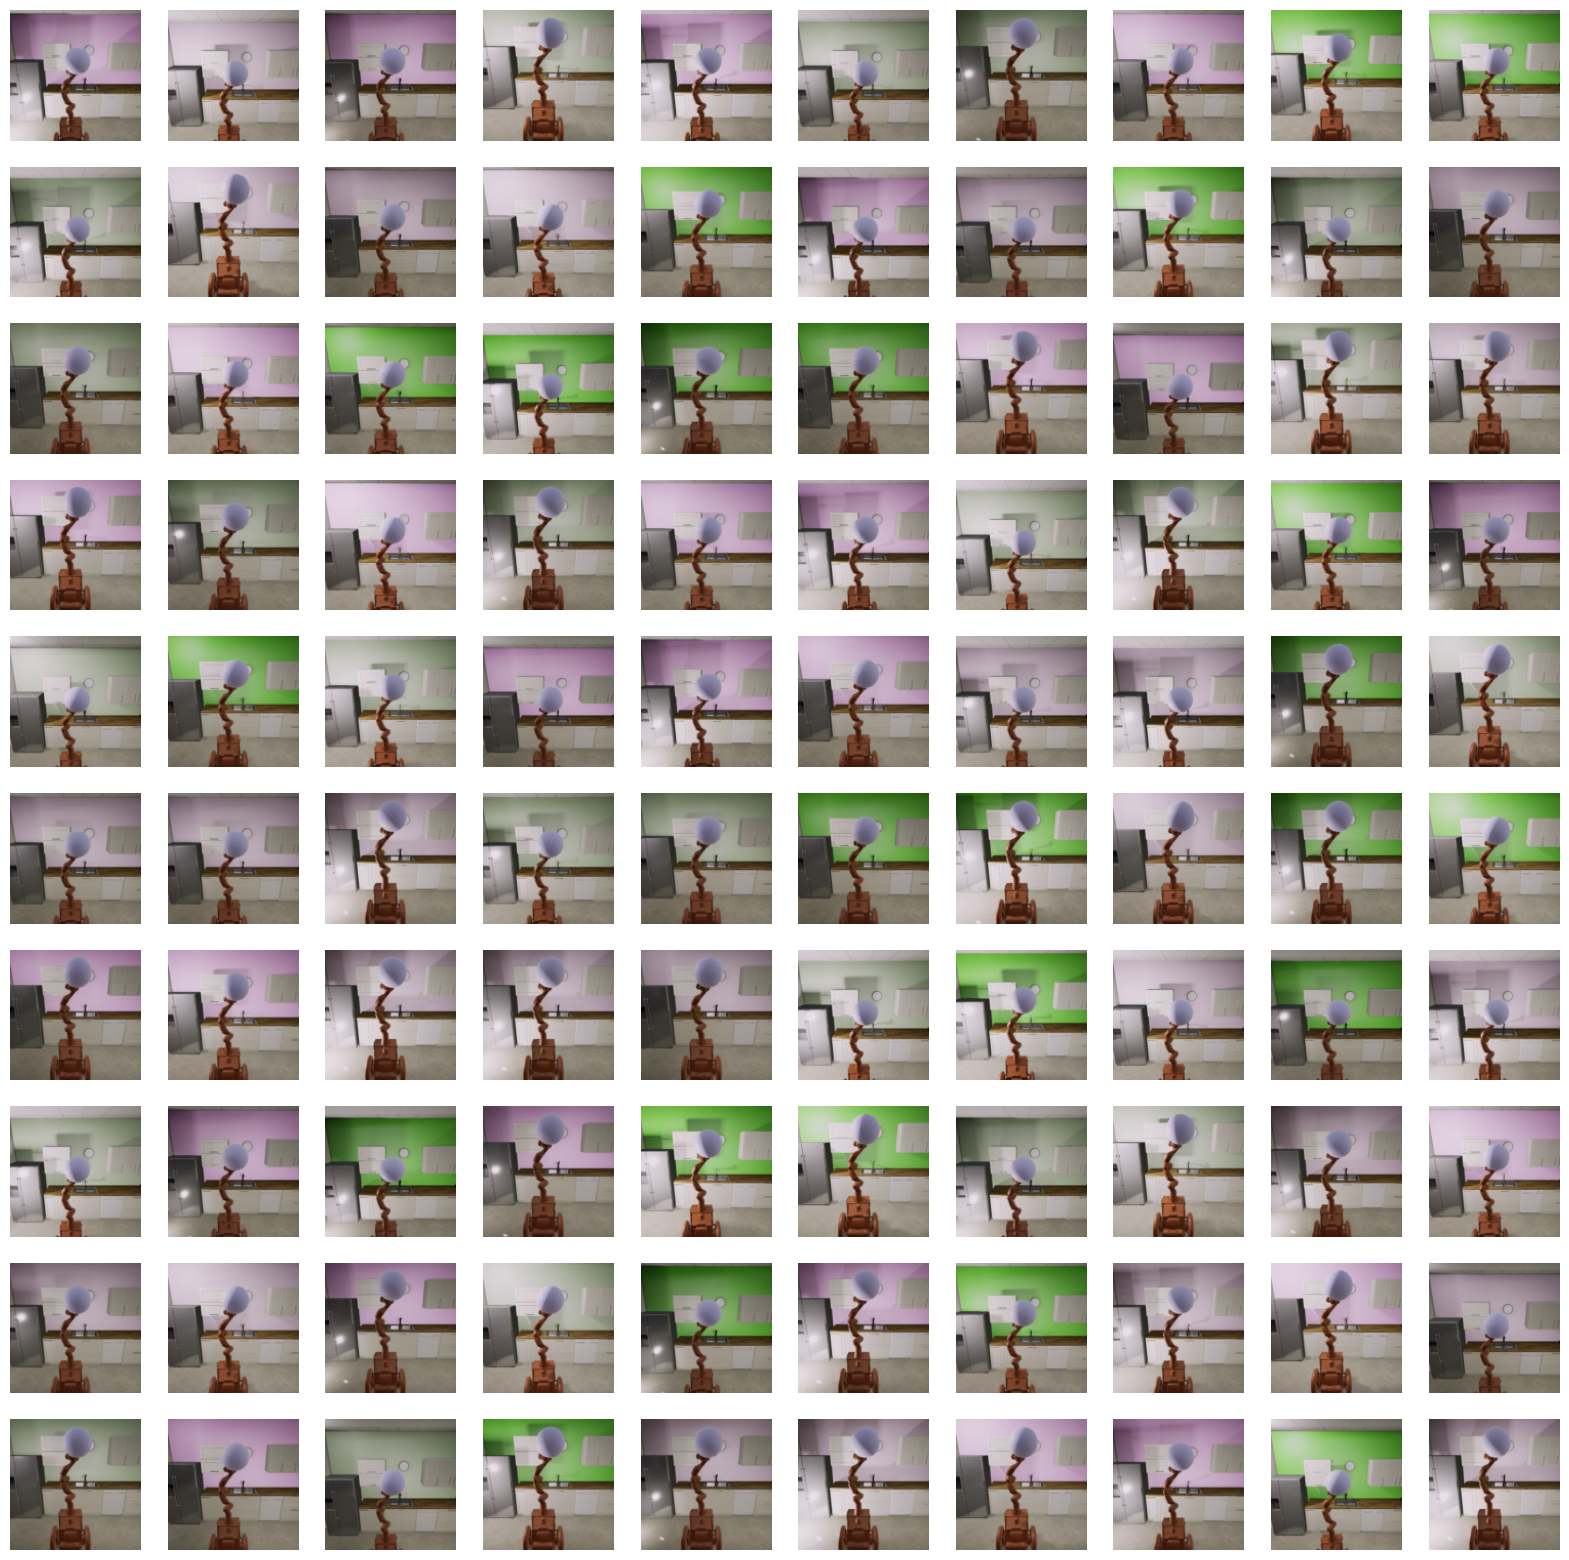

In [70]:
sampled_paths = np.random.choice(x_paths, 100)
fig, axs = plt.subplots(10, 10, figsize=(20, 20))
for i, ax in enumerate(axs.flat):
    ax.imshow(plt.imread(sampled_paths[i]))
    ax.axis('off')

In [78]:
x = []
for path in x_paths:
    x.append(np.array(Image.open(path)))
x = np.stack(x)
x.shape

(384, 128, 128, 3)

In [81]:
sources_filtered = [3, 5, 6, 8]
s = sources[i_filtered, :][:, sources_filtered]

In [83]:
np.unique(s, axis=0)

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.33333333],
       [0.        , 0.        , 0.        , 0.66666667],
       ...,
       [1.        , 1.        , 1.        , 0.33333333],
       [1.        , 1.        , 1.        , 0.66666667],
       [1.        , 1.        , 1.        , 1.        ]])

In [86]:
dataset = {
    'x': x,
    's': s,
    'source_names': [list(source_to_num_classes.keys())[i] for i in sources_filtered],
}
np.savez('isaac3d_reduced.npz', **dataset)

In [85]:
dataset

{'x': array([[[[ 20,  51,   8],
          [ 21,  52,   8],
          [ 21,  53,   9],
          ...,
          [ 45,  92,  24],
          [ 44,  90,  22],
          [ 43,  89,  23]],
 
         [[ 21,  51,   9],
          [ 21,  52,   8],
          [ 21,  54,   9],
          ...,
          [ 46,  92,  25],
          [ 46,  92,  26],
          [ 46,  91,  25]],
 
         [[ 21,  51,   8],
          [ 22,  53,   9],
          [ 22,  55,  10],
          ...,
          [ 48,  94,  27],
          [ 48,  93,  28],
          [ 48,  93,  28]],
 
         ...,
 
         [[154, 145, 133],
          [148, 139, 126],
          [145, 137, 124],
          ...,
          [121, 114,  99],
          [121, 114, 100],
          [120, 113,  99]],
 
         [[150, 142, 130],
          [146, 138, 125],
          [142, 134, 121],
          ...,
          [120, 113,  98],
          [118, 111,  96],
          [117, 111,  96]],
 
         [[150, 141, 130],
          [144, 136, 124],
          [138, 131, 117]